### **ESTRATEGIAS DE MUESTREO EN DATOS DESBALANCEADOS**


### **1.Instalación de Librerias**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### **2.Importación del caso de negocio**

In [2]:
data = pd.read_csv('Clasificacion_picos_intensidad.csv')

### **3. Exploracion de datos**

In [ ]:
data.head()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [3]:
data.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo', 'picos_intens'],
      dtype='object')

In [4]:
data.describe()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,8112.488348,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,4274.733801,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,316.000000,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,4463.500000,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,8168.000000,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,11818.500000,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,15419.000000,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [5]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(14375, 9)

In [6]:
# Detección del desbalance de la muestras
data.groupby('picos_intens').size()

,0
picos_intens,
0.0,12868
1.0,1507


Class 0 Buen_Estado: 12868
Class 1 Fallo: 1507
Proporción: 8.54 : 1


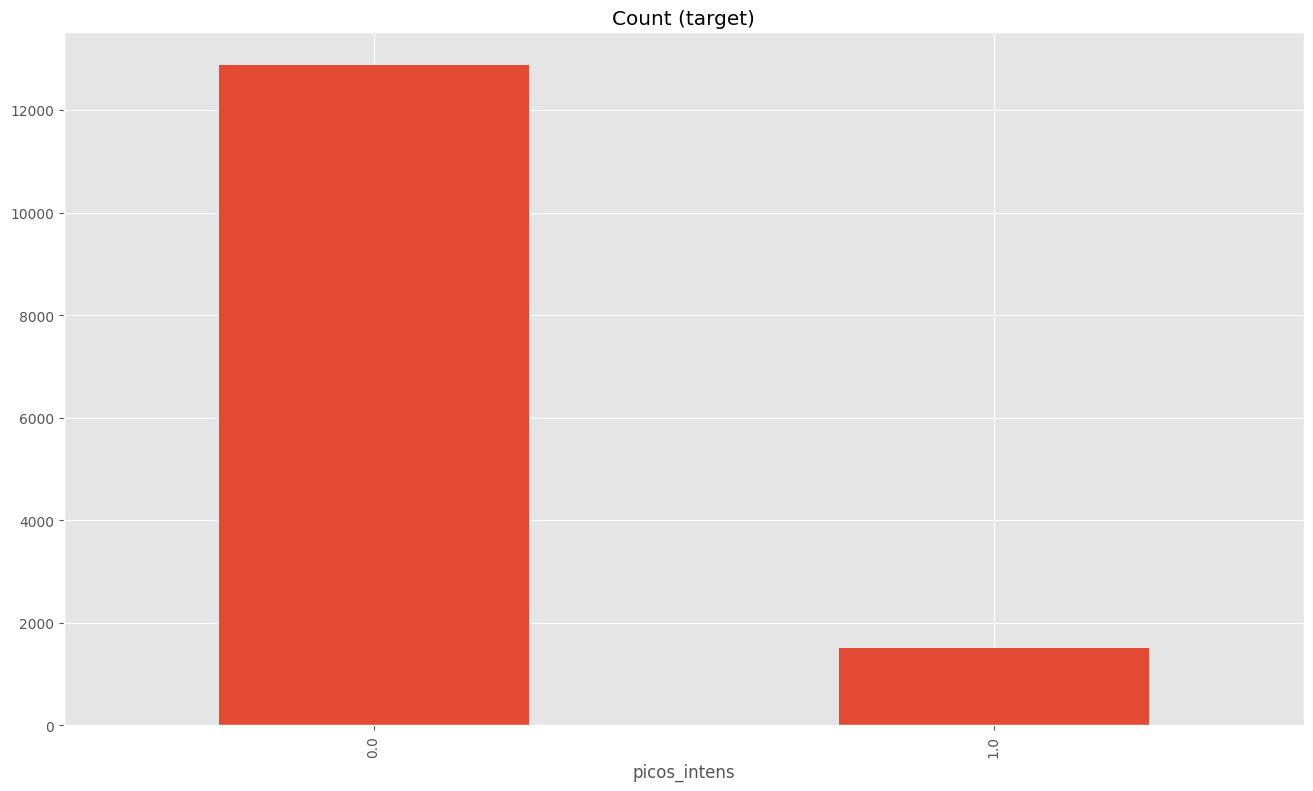

In [7]:
# Detección del desbalance de la muestras
target_count = data.picos_intens.value_counts()
print('Class 0 Buen_Estado:', target_count[0])
print('Class 1 Fallo:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [8]:
data.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo', 'picos_intens'],
      dtype='object')

In [9]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y = data[['picos_intens']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

### **5. Estrategias de Muestreo Oversampling y Under Sampling**


In [10]:
# Solo utilizaremos Datos de entrenamiento para la estrategia
df_train = pd.concat([X_train,y_train],axis=1)

In [ ]:
df_train.head(3)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
11168,12208,6244.64,4098.98,8.63,77.27,11842.78,78.01,2.20,0.0
5557,6484,6068.47,3628.43,8.73,75.56,10815.12,67.82,2.04,0.0
12724,13768,6121.00,3030.07,8.62,77.63,10502.60,73.29,1.99,0.0


In [11]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.picos_intens.value_counts()

# Divide by class
df_class_0 = df_train[df_train['picos_intens'] == 0]
df_class_1 = df_train[df_train['picos_intens'] == 1]

In [12]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(8354, 8354, 989, 989)

**UnderSampling**

In [13]:
df_class_0.sample(3)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
8012,9009,6067.65,3301.62,8.83,77.10,10640.74,84.15,1.99,0.0
5990,6933,6096.28,3855.41,8.73,76.88,10730.24,58.34,2.01,0.0
1197,1910,6083.34,3666.30,8.93,78.10,11034.69,62.84,2.03,0.0


Estrategia de Muestreo under-sampling:
picos_intens
0.0    989
1.0    989
Name: count, dtype: int64


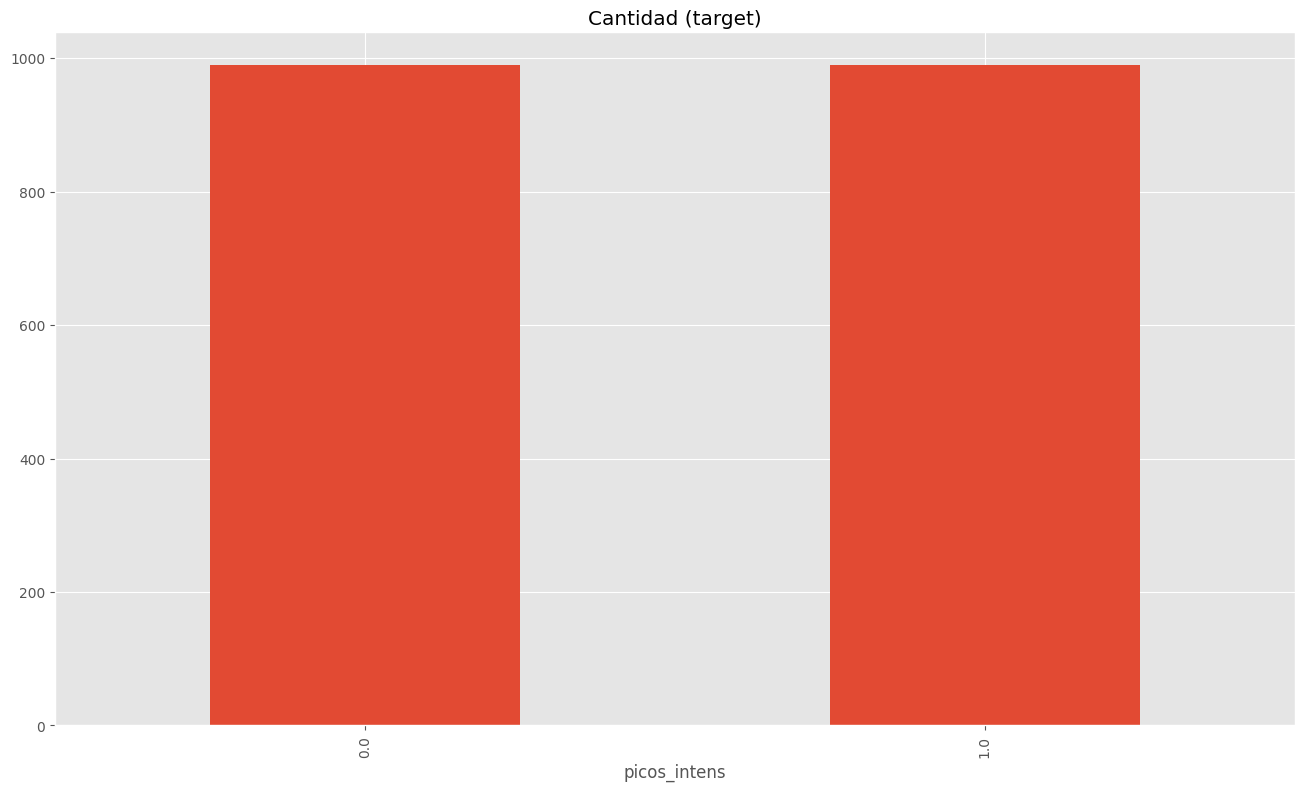

In [14]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train_under.picos_intens.value_counts())

df_train_under.picos_intens.value_counts().plot(kind='bar', title='Cantidad (target)');

**OverSampling**

In [15]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
13694,14739,6123.0,3000.85,8.74,77.91,11078.35,76.18,2.07,1.0
2956,3794,6105.0,3092.94,8.84,75.32,10719.84,55.04,1.99,1.0
13694,14739,6123.0,3000.85,8.74,77.91,11078.35,76.18,2.07,1.0
2956,3794,6105.0,3092.94,8.84,75.32,10719.84,55.04,1.99,1.0


Random over-sampling:
picos_intens
0.0    8354
1.0    8354
Name: count, dtype: int64


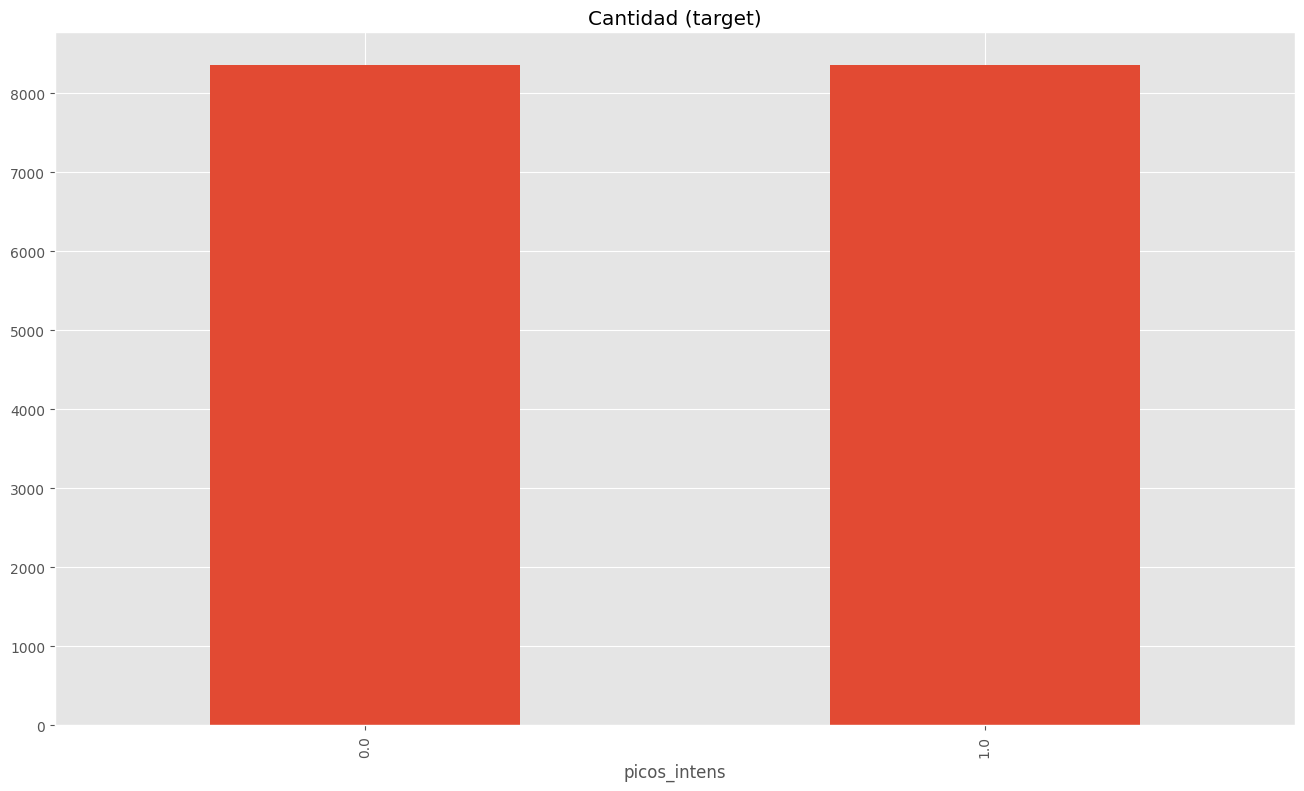

In [16]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.picos_intens.value_counts())

df_train_over.picos_intens.value_counts().plot(kind='bar', title='Cantidad (target)');

### **6.Estrategia de Muestreo SMOTE**

SMOTE (Synthetic Minority Oversampling TEchnique) consiste en sintetizar elementos para la clase minoritaria, basados ​​en los que ya existen. Funciona seleccionando aleatoriamente un punto de la clase minoritaria y calculando los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos o similares.

In [17]:
!pip install imblearn

In [18]:
#!pip install imblearn
import imblearn

In [19]:
X_train.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo'],
      dtype='object')

In [20]:
cols = ['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']
aux_1 = pd.concat([data[data['picos_intens']==0].head(6),data[data['picos_intens']==1].head(3)],axis='rows')[cols]
aux_2 = pd.concat([data[data['picos_intens']==0].head(6),data[data['picos_intens']==1].head(3)],axis='rows')['picos_intens']

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=2,sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(aux_1,aux_2)
#pd.concat([X_sm,y_sm],axis=1)

In [ ]:
pd.concat([aux_1,aux_2],axis='columns')

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0
5,321,6134.94,3310.82,8.84,74.28,10898.56,66.53,2.01,0.0
24,340,6147.00,3300.64,8.83,74.26,10696.45,65.14,1.97,1.0
27,343,6133.20,3297.01,8.83,74.17,10825.06,65.24,1.98,1.0
28,344,6129.53,3312.26,8.83,74.52,10828.43,65.32,1.97,1.0


In [21]:
from imblearn.over_sampling import SMOTE
# entre 4 y 6 k
smote = SMOTE(sampling_strategy='minority',k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X_train,y_train)

X_smote = pd.DataFrame(data=X_sm,columns=['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo'])
y_smote = pd.DataFrame(data=y_sm,columns=['picos_intens'])

df_train_smote = pd.concat([X_smote, y_smote],axis=1)
df_train_smote.count()

,0
Unnamed: 0,16708
Presion,16708
Tonelaje,16708
Velocidad,16708
%Solidos,16708
Potencia,16708
F80,16708
Brazo,16708
picos_intens,16708


In [22]:
y_train['picos_intens'].value_counts()

,count
picos_intens,
0.0,8354
1.0,989


In [23]:
8354 * 2

16708

In [24]:
df_train_smote['picos_intens'].value_counts()

,count
picos_intens,
0.0,8354
1.0,8354


In [25]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

SMOTE:
picos_intens
0.0    8354
1.0    8354
Name: count, dtype: int64


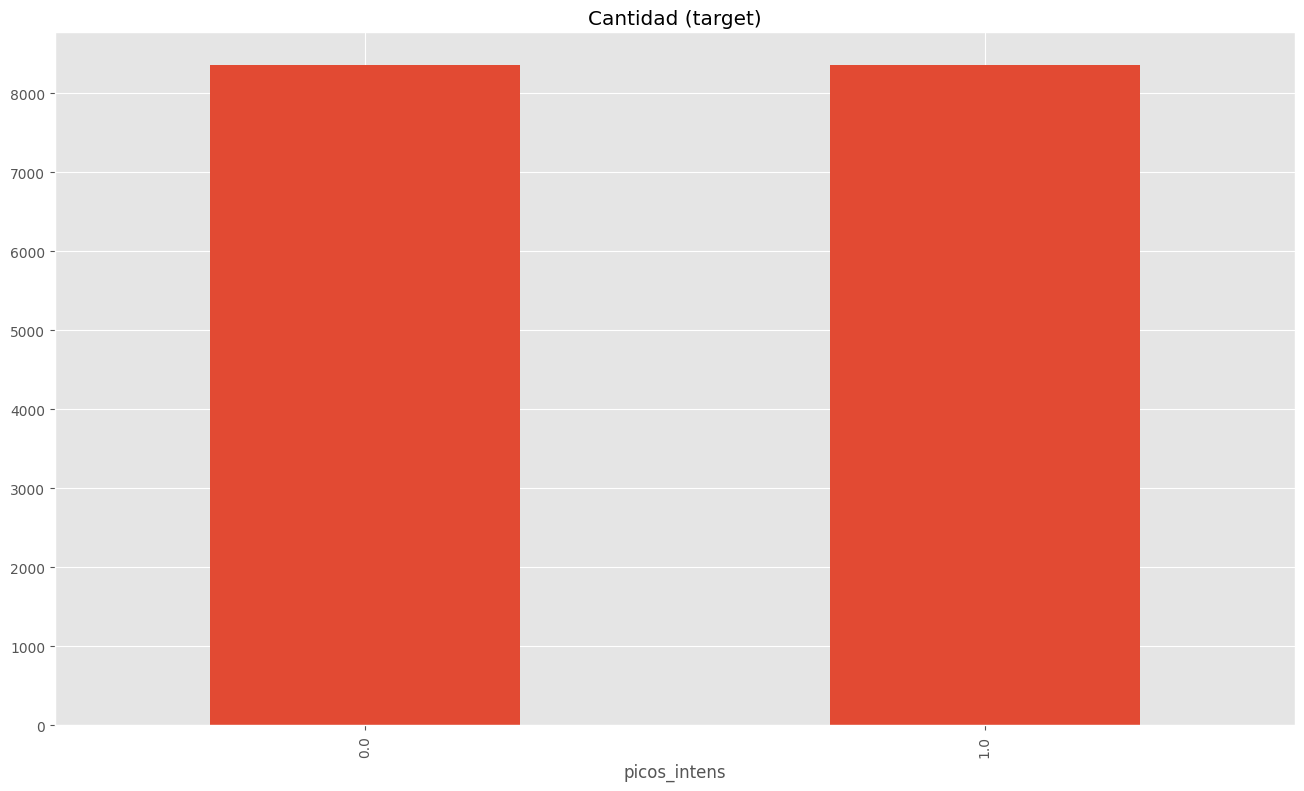

In [26]:
print('SMOTE:')
print(df_train_smote.picos_intens.value_counts())

df_train_smote.picos_intens.value_counts().plot(kind='bar', title='Cantidad (target)');

# Referencias de investigación
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets